In [1]:
import os,sys
sys.path.append("../notebook_utilities/")
from analysis_common import *

Matplotlib is building the font cache; this may take a moment.


In [2]:
from root_common import *

In [3]:
import pandas as pd
import dask.dataframe as dd

In [4]:
import glob

In [5]:
# Pattern to match the ROOT files
file_pattern = "/Users/wketchum/Data/LDMX/production_06Nov2024/*/*_ana.root"

# List to hold the DataFrames
dfs = []

In [6]:
# Loop through each file matching the pattern
for filename in glob.glob(file_pattern)[:10]:
    print(filename)
    # Open the ROOT file
    with uproot.open(filename) as file:
        # Extract the TTree named "ana_tree"
        tree = file["ana_tree"]
        
        df = tree.arrays(library="pd")
        
        # Convert Pandas DataFrame to Dask DataFrame
        #ddf = dd.from_pandas(df, npartitions=1)  # Adjust npartitions based on your dataset/cluster
        #dfs.append(ddf)
        dfs.append(df)

# Concatenate all Dask DataFrames into a single DataFrame
#combined_ddf = dd.multi.concat(dfs, axis=0)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

/Users/wketchum/Data/LDMX/production_06Nov2024/ldmx_genie_output_run_100007/ldmx_genie_G21_11b_00_000_Ti_8GeV_100007_reco_ana.root
/Users/wketchum/Data/LDMX/production_06Nov2024/ldmx_genie_output_run_100000/ldmx_genie_G21_11b_00_000_Ti_8GeV_100000_reco_ana.root
/Users/wketchum/Data/LDMX/production_06Nov2024/ldmx_genie_output_run_100009/ldmx_genie_G21_11b_00_000_Ti_8GeV_100009_reco_ana.root
/Users/wketchum/Data/LDMX/production_06Nov2024/ldmx_genie_output_run_100008/ldmx_genie_G21_11b_00_000_Ti_8GeV_100008_reco_ana.root
/Users/wketchum/Data/LDMX/production_06Nov2024/ldmx_genie_output_run_100001/ldmx_genie_G21_11b_00_000_Ti_8GeV_100001_reco_ana.root
/Users/wketchum/Data/LDMX/production_06Nov2024/ldmx_genie_output_run_100006/ldmx_genie_G21_11b_00_000_Ti_8GeV_100006_reco_ana.root
/Users/wketchum/Data/LDMX/production_06Nov2024/ldmx_genie_output_run_100003/ldmx_genie_G21_11b_00_000_Ti_8GeV_100003_reco_ana.root
/Users/wketchum/Data/LDMX/production_06Nov2024/ldmx_genie_output_run_100004/ldmx_ge

In [7]:
combined_df = pd.concat(dfs[:2],ignore_index=True)

In [8]:
# Generating logarithmically spaced bins
x_bins = np.logspace(np.log10(0.1), np.log10(10), 40)
y_bins = np.logspace(np.log10(0.01), np.log10(20), 40)

In [9]:
%matplotlib inline

In [10]:
combined_df["q_2"] = combined_df["elec_px"]*combined_df["elec_px"]+combined_df["elec_py"]*combined_df["elec_px"]+(8000-combined_df["elec_pz"])*(8000-combined_df["elec_pz"])

In [11]:
combined_df["Q2"] = combined_df["q_2"]-(8000-combined_df["elec_e"])*(8000-combined_df["elec_e"])

In [12]:
combined_df["w"] = (8000-combined_df["elec_e"])

In [13]:
combined_df

,run,event,elec_px,elec_py,elec_pz,elec_pt,elec_p,elec_e,elec_thetaz,genie_lep_i_pdg,...,trig_Electron_pz,trig_Electron_dx,trig_Electron_dy,trig_Electron_x,trig_Electron_y,trig_Electron_tp,trig_Electron_depth,q_2,Q2,w
0,100007,1,196.843291,160.929873,7618.637724,254.255197,7622.879146,7622.879163,0.033360,11,...,"[10890.8955078125, 214.64234924316406, 164.594...","[9.541706651449203, 3.8825063705444336, -34.05...","[8.730047702789307, 26.461055278778076, 166.01...","[-9.381851196289062, -9.381851196289062, -9.38...","[6.207726001739502, 6.207726001739502, 6.20772...","[72.0, 13.0, 6.0]","[25.0, 6.0, 6.0]",2.158624e+05,73642.306949,377.120837
1,100007,2,33.137944,148.912763,7968.271725,152.555348,7969.731954,7969.731970,0.019143,11,...,"[8982.9970703125, 312.7651062011719]","[-5.612720489501953, 21.02778148651123]","[4.302867889404297, 8.881948471069336]","[9.420683860778809, 9.420683860778809]","[-35.4151611328125, -35.4151611328125]","[51.0, 10.0]","[19.0, 5.0]",7.039469e+03,6123.315853,30.268030
2,100007,3,-226.115676,-241.229520,7419.691139,330.635721,7427.054367,7427.054385,0.044532,11,...,[8450.7421875],[-16.591493785381317],[-10.028352737426758],[-0.6330087780952454],[-22.876718521118164],[60.0],[18.0],4.424324e+05,114165.771378,572.945615
3,100007,4,-380.306919,-216.922771,7230.513824,437.822842,7243.757243,7243.757261,0.060478,11,...,[8447.4208984375],[-15.041801452636719],[-11.908466339111328],[-2.0121498107910156],[-28.306289672851562],[53.0],[18.0],8.192396e+05,247336.478763,756.242739
4,100007,5,-203.562101,292.602077,7907.123851,356.445654,7915.153890,7915.153907,0.045049,11,...,"[8590.220703125, 1011.2929077148438]","[-13.253612756729126, -7.72053074836731]","[13.38361930847168, 27.651427745819092]","[-0.503162145614624, -0.503162145614624]","[-34.94705581665039, -34.94705581665039]","[46.0, 13.0]","[18.0, 9.0]",-9.499186e+03,-16698.045098,84.846093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,100000,9996,124.282255,140.053083,7972.925678,187.245681,7975.124125,7975.124141,0.023481,11,...,[9435.978515625],[4.725193023681641],[5.019561767578125],[7.645035743713379],[-24.306461334228516],[52.0],[17.0],3.358521e+04,32966.402643,24.875859
19996,100000,9997,158.126435,210.155754,7876.965120,263.000780,7881.354510,7881.354527,0.033376,11,...,[8496.9130859375],[5.2257609367370605],[10.942394256591797],[2.2592296600341797],[-28.79746437072754],[55.0],[20.0],7.337273e+04,59295.982903,118.645473
19997,100000,9998,67.505388,186.187932,7201.038761,198.047780,7203.761667,7203.761685,0.027496,11,...,[8628.66796875],[0.5999879837036133],[8.17680549621582],[-5.992215156555176],[-23.465667724609375],[52.0],[19.0],6.554647e+05,21469.273887,796.238315
19998,100000,9999,138.449629,-49.573019,1958.020670,147.057078,1963.535263,1963.535329,0.074964,11,...,"[3357.95361328125, 139.34873962402344, 90.4476...","[36.74648332595825, 63.07514238357544, 118.308...","[-13.001144409179688, -8.251129865646362, 109....","[6.771766185760498, 6.771766185760498, 6.77176...","[7.741018772125244, 7.741018772125244, 7.74101...","[73.0, 18.0, 12.0, 11.0]","[30.0, 15.0, 12.0, 11.0]",3.651782e+07,78913.437025,6036.464671


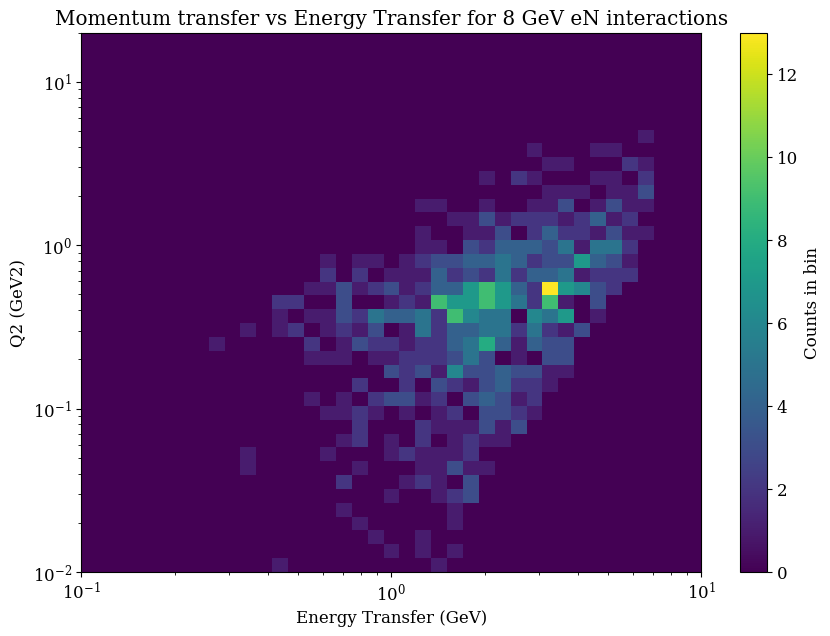

In [14]:
filtered_df = combined_df.query("elec_pt>500 and genie_dis==1")

# Creating the 2D histogram plot
plt.figure(figsize=(10, 7))
plt.hist2d(filtered_df["w"]/1e3, filtered_df["Q2"]/1e6, bins=[x_bins, y_bins], cmap='viridis')
plt.colorbar(label='Counts in bin')

# Setting the scale to logarithmic if necessary
plt.xscale('log')
plt.yscale('log')

# Setting labels and title
plt.xlabel('Energy Transfer (GeV)')
plt.ylabel('Q2 (GeV2)')
plt.title('Momentum transfer vs Energy Transfer for 8 GeV eN interactions')

# Display the plot
plt.show()

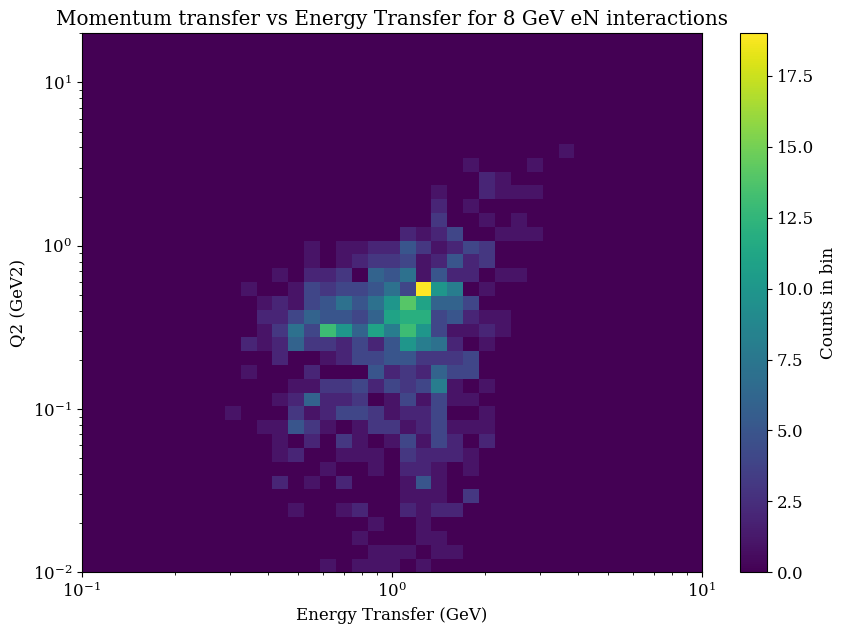

In [18]:
filtered_df = combined_df.query("elec_pt>500 and genie_res==1")

# Creating the 2D histogram plot
plt.figure(figsize=(10, 7))
plt.hist2d(filtered_df["w"]/1e3, filtered_df["Q2"]/1e6, bins=[x_bins, y_bins], cmap='viridis')
plt.colorbar(label='Counts in bin')

# Setting the scale to logarithmic if necessary
plt.xscale('log')
plt.yscale('log')

# Setting labels and title
plt.xlabel('Energy Transfer (GeV)')
plt.ylabel('Q2 (GeV2)')
plt.title('Momentum transfer vs Energy Transfer for 8 GeV eN interactions')

# Display the plot
plt.show()

In [ ]:
ana_files = glob.glob('/Users/wketchum/Data/LDMX/production_07Jan2024/*_ana.root')
ana_files.sort()

In [ ]:
ana_tree = ROOT.TChain("ana_tree")

In [ ]:
ana_tree.Add('/Users/wketchum/Data/LDMX/production_07Jan2024/*_ana.root')

In [ ]:
c = ROOT.TCanvas("c")

In [ ]:
for obj in ana_tree.GetListOfBranches():
    print(obj)

In [ ]:
ana_tree.Draw("elec_pt")
c.Draw()

In [ ]:
ana_tree.Draw("(elec_px*elec_px)+(elec_py*elec_py)+(8000-elec_pz)*(8000-elec_pz)","elec_pt>500")
c.Draw()

In [ ]:
ana_tree.Draw("elec_e:elec_pt","1","colz")
c.Draw()

In [ ]:
ana_tree.Draw("((elec_px*elec_px)+(elec_py*elec_py)+(8000-elec_pz)*(8000-elec_pz)-(8000-elec_e)*(8000-elec_e))/1e6:(8000-elec_e)/1e3","1","colz")
c.Draw()